# Lab 6: Calculations

## Part 1: Differential Pressure Measurments

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math

In [2]:
dirPath = os.path.realpath('.')
fileName = 'rawData/lab 6 measurements (2).xlsx'
filePath = os.path.join(dirPath, fileName)
df = pd.read_excel(filePath,sheetname="Part1",header=0)
print(df)
cols = df.columns

    deltah(cm)  error(cm)  V (mV)  error (mV)  deltah(cm).1  error(cm).1  \
0            0          1       1           1           -75            1   
1           -5          1     -17           1           -70            1   
2          -10          1     -34           1           -65            1   
3          -15          1     -54           1           -60            1   
4          -20          1     -67           1           -55            1   
5          -25          1     -86           1           -50            1   
6          -30          1    -106           1           -45            1   
7          -35          1    -122           1           -40            1   
8          -40          1    -141           1           -35            1   
9          -45          1    -160           1           -30            1   
10         -50          1    -177           1           -25            1   
11         -55          1    -194           1           -20            1   
12         -

### Plotting

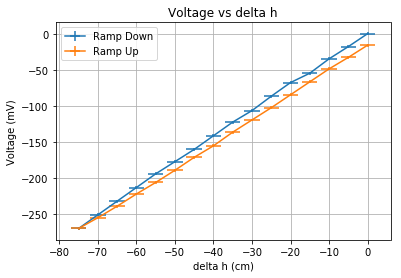

In [3]:
plt.figure(1)
plt.errorbar(df[cols[0]],df[cols[2]],xerr=2*df[cols[1]],yerr=2*df[cols[3]])
plt.errorbar(df[cols[4]],df[cols[6]],xerr=2*df[cols[5]],yerr=2*df[cols[7]])
plt.title('Voltage vs delta h')
plt.xlabel('delta h (cm)')
plt.ylabel('Voltage (mV)')
plt.legend(['Ramp Down','Ramp Up'])
plt.grid()
plt.savefig('pressure.png')
plt.show()

### Plot again, but zoom in so that error bars are visible

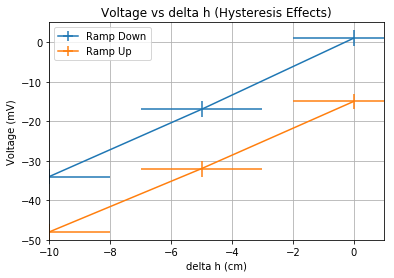

In [4]:
plt.figure(1)
plt.errorbar(df[cols[0]],df[cols[2]],xerr=2*df[cols[1]],yerr=2*df[cols[3]])
plt.errorbar(df[cols[4]],df[cols[6]],xerr=2*df[cols[5]],yerr=2*df[cols[7]])
plt.title('Voltage vs delta h (Hysteresis Effects)')
plt.xlabel('delta h (cm)')
plt.ylabel('Voltage (mV)')
plt.legend(['Ramp Down','Ramp Up'])
plt.axis([-10,1,-50,5])
plt.grid()
plt.savefig('pressureHysteresis.png')
plt.show()

#### Sensitivity Calculations

In [5]:
sensitivity = df['V (mV)'][1:]/df['deltah(cm)'][1:]
print('sensitivity =',np.average(sensitivity), 'mV/cm')

sens_error = np.sqrt((df['error(cm)'][1:]/df['V (mV)'][1:])**2 + (df['error (mV)'][1:]/df['deltah(cm)'][1:])**2)*sensitivity
print('sensitivity error =', np.average(sens_error), 'mV/cm')

sensitivity = 3.51078806379 mV/cm
sensitivity error = 0.159453662338 mV/cm


#### Sensitivity with Hysteresis Effects Calculations

In [6]:
sensitivity_h = df['V (mV).1'][0:10]/df['deltah(cm).1'][0:10]
print(sensitivity_h)
print('sensitivity =',np.average(sensitivity_h), 'mV/cm')

sens_error_h = np.sqrt((df['error(cm).1'][0:10]/df['V (mV).1'][0:10])**2 + (df['error (mV)'][0:10]/df['deltah(cm).1'][0:10])**2)*sensitivity_h
print('sensitivity error =', np.average(sens_error_h), 'mV/cm')

0    3.600000
1    3.642857
2    3.676923
3    3.700000
4    3.745455
5    3.780000
6    3.800000
7    3.875000
8    3.885714
9    3.966667
dtype: float64
sensitivity = 3.76726157176 mV/cm
sensitivity error = 0.0813336209479 mV/cm


### Effects of Hysteresis

In [7]:
hysteresisOffset = df[cols[1]][0]-df[cols[6]][len(df[cols[4]])-1]
print('Hysteresis Offset =', hysteresisOffset,'mV')
hysteresisError = np.sqrt(1**2 + 1**2)
print('Hysteresis Error =',hysteresisError, 'mV')

Hysteresis Offset = 16 mV
Hysteresis Error = 1.41421356237 mV


## Part 2: Accelerometer Angle Measurements

Make a new data frame <code>dfangle</code> to hold the data from the accelAngle sheet.

In [8]:
dfangle = pd.read_excel(filePath,sheetname="accelAngle",header=0)
print(dfangle)
colsangle = dfangle.columns

    Angle (deg)  error  Voltage (mV)  error.1
0            90      1           0.7      0.5
1            80      1         130.0      0.5
2            70      1         246.0      0.5
3            60      1         362.0      0.5
4            50      1         468.0      0.5
5            40      1         556.0      0.5
6            30      1         628.0      0.5
7            20      1         681.0      0.5
8            10      1         716.0      0.5
9             0      1         728.0      0.5
10           10      1         715.0      0.5
11           20      1         680.0      0.5
12           30      1         630.0      0.5
13           40      1         557.0      0.5
14           50      1         467.0      0.5
15           60      1         361.0      0.5
16           70      1         247.0      0.5
17           80      1         129.0      0.5
18           90      1           0.9      0.5


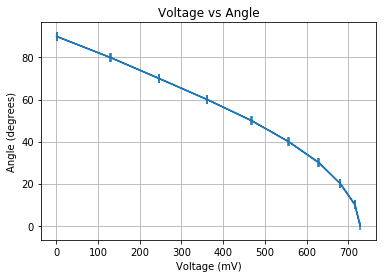

In [9]:
plt.figure(2)
plt.errorbar(dfangle[colsangle[2]],dfangle[colsangle[0]],xerr=2*dfangle[colsangle[3]],yerr=2*dfangle[colsangle[1]])
plt.grid()
plt.title('Voltage vs Angle')
plt.ylabel('Angle (degrees)')
plt.xlabel('Voltage (mV)')
plt.savefig('VoltAngle.png')
plt.show()

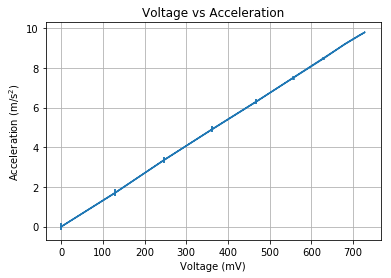

In [10]:
accArray = []
accArrayError = []
for i in range(0,len(dfangle[colsangle[0]])):
    accArray.append(math.cos(math.radians(np.array(dfangle[colsangle[0]][i]))))
for i in range(0,len(dfangle[colsangle[0]])):    
    accArrayError.append(math.sin(math.radians(np.array(dfangle[colsangle[0]][i]))))
acc = 9.8*np.array(accArray)                      
accError=9.8*math.radians(1)*np.array(accArrayError)
plt.figure(3)
plt.errorbar(dfangle[colsangle[2]],acc,xerr=2*dfangle[colsangle[3]],yerr= accError)
plt.grid()
plt.title('Voltage vs Acceleration')
plt.ylabel('Acceleration (m/s$^2$)')
plt.xlabel('Voltage (mV)')
plt.savefig('VoltAcceleration.png')
plt.show()

## Part 2: Static Measurements

In [11]:
dfstatic = pd.read_excel(filePath,sheetname="staticMeasurements",header=0)
print(dfstatic)
colsstatic = dfstatic.columns

   mass added  Mass(kg)     Force  Force Error  Displacement (cm)  error (cm)  \
0      0.0000    0.1316  1.290996     0.129100                0.5        0.05   
1      0.0935    0.2251  2.208231     0.061340                1.8        0.05   
2      0.1097    0.3348  3.284388     0.049763                3.3        0.05   
3      0.1456    0.4804  4.712724     0.045315                5.2        0.05   
4      0.1486    0.6290  6.170490     0.040068                7.7        0.05   

   disp (m)  
0    0.0005  
1    0.0018  
2    0.0033  
3    0.0052  
4    0.0077  


In [12]:
gravity = 9.81  # m/s/s
kstatic = dfstatic['Force']/dfstatic['disp (m)']
print('kstatic')
print(kstatic)

kstatic_error = kstatic*np.sqrt((dfstatic['Force Error']/dfstatic['Force'])**2 + (dfstatic['error (cm)']/dfstatic['Displacement (cm)'])**2)
print('\n error in kstatic =')
print(kstatic_error)

kstatic
0    2581.992000
1    1226.795000
2     995.269091
3     906.293077
4     801.362338
dtype: float64

 error in kstatic =
0    365.148810
1     48.193059
2     21.326107
3     12.323961
4      7.359075
dtype: float64


## Part 2: Dynamic Measurements

In [13]:
dfdynamic = pd.read_excel(filePath,sheetname="dynamicMeasurements",header=0)
print(dfdynamic)
colsdynamic = dfdynamic.columns

   freq (Hz)  error  period  error.1      omega
0       2.17   0.05     440       20  13.634512
1       2.08   0.05     470       20  13.069025
2       2.17   0.05     480       20  13.634512
3       2.22   0.05     440       20  13.948671
4       2.17   0.05     460       20  13.634512


__NOTE:__ We also need to define the mass

In [14]:
MASS = 0.2772

### Now lets calculate $k_{dynamic}$

In [15]:
kdynamic = MASS*dfdynamic['omega']**2
print('kdynamic =')
print(kdynamic)
# now calculate error
num = range(0,5)
kdynamic_error = dfdynamic['error']/dfdynamic['freq (Hz)']*kdynamic*2
print('\nkdynamic error =')
print(kdynamic_error)

kdynamic =
0    51.531458
1    47.345601
2    51.531458
3    53.933538
4    51.531458
Name: omega, dtype: float64

kdynamic error =
0    2.374722
1    2.276231
2    2.374722
3    2.429439
4    2.374722
dtype: float64


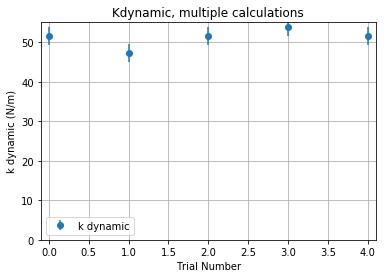

In [16]:
plt.figure(4)
plt.errorbar(num,kdynamic,yerr=kdynamic_error,fmt='o')
plt.title('Kdynamic, multiple calculations')
plt.xlabel('Trial Number')
plt.ylabel('k dynamic (N/m)')
plt.legend(['k dynamic'])
plt.axis([-0.1,4.1,0,55])
plt.grid()
plt.savefig('kdynamic.png')
plt.show()

In [17]:
dfWheat = pd.read_excel(filePath,sheetname="Wheatstone",header=0)
print(dfWheat)
colsWheat = dfWheat.columns

    R(ohm)  Vout (V)   error
0      110  -10.7360  0.0050
1      112   -8.5290  0.0050
2      114   -6.3410  0.0050
3      116   -4.1980  0.0050
4      118   -2.0980  0.0050
5      120    0.0054  0.0005
6      122    2.0350  0.0050
7      124    4.0470  0.0050
8      126    6.0170  0.0050
9      128    7.8520  0.0050
10     130    9.8750  0.0050


In [23]:
R3 = np.linspace(110,130,11)
R1 = 120
R2 = 120
R4 = 120
expectedVout = 30*(R2/(R2+R1)-R4/(R3+R4))
print(expectedVout)

[-0.65217391 -0.51724138 -0.38461538 -0.25423729 -0.12605042  0.
  0.12396694  0.24590164  0.36585366  0.48387097  0.6       ]


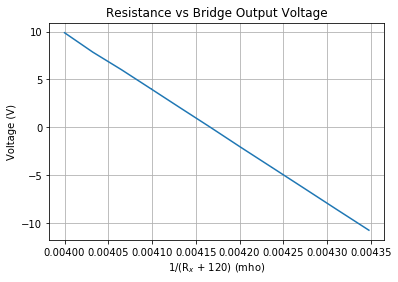

In [19]:
wheatArray = []
for i in range(0,len(dfWheat[colsWheat[0]])):
    wheatArray.append(1/(np.array(dfWheat[colsWheat[0]][i])+120))
    

plt.figure(5)
plt.plot()
plt.errorbar(wheatArray,dfWheat[colsWheat[1]],xerr=0,yerr=2*dfWheat[colsWheat[2]])
plt.grid()
plt.title('Resistance vs Bridge Output Voltage')
plt.ylabel('Voltage (V)')
plt.xlabel('1/(R$_x$ + 120) (mho)')
plt.savefig('Wheatstone.png')
plt.show()